# Project 3: Web APIs & NLP - 02

Kelly Slatery | US-DSI-10 | 01.31.2020

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Clean data

In [2]:
# Set viewing options
pd.set_option('display.max_columns', 10000)

### Decide which submissions data columns to use in analysis

In [3]:
# Import beatles submissions (20,000)
beatles_subs = pd.read_csv('./data/beatles_subs.csv', low_memory=False)

In [4]:
# Look at columns to start deciding which columns to drop (not include in analysis)
beatles_subs.columns

Index(['all_awardings', 'allow_live_comments', 'author', 'author_cakeday',
       'author_created_utc', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'author_patreon_flair', 'author_premium', 'awarders', 'banned_by',
       'can_mod_post', 'category', 'content_categories', 'contest_mode',
       'created_utc', 'crosspost_parent', 'crosspost_parent_list', 'domain',
       'edited', 'full_link', 'gilded', 'gildings', 'id', 'is_crosspostable',
       'is_meta', 'is_original_content', 'is_reddit_media_domain',
       'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_css_class',
       'link_flair_richtext', 'link_flair_template_id', 'link_flair_text',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media',
       'media_embed', 'media_metadata', 'media_

In [5]:
# Look for nulls to see which columns do not hold enough data to be valuable
pd.DataFrame(beatles_subs.isnull().sum()).T

,all_awardings,allow_live_comments,author,author_cakeday,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,banned_by,can_mod_post,category,content_categories,contest_mode,created_utc,crosspost_parent,crosspost_parent_list,domain,edited,full_link,gilded,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media,media_embed,media_metadata,media_only,no_follow,num_comments,num_crossposts,og_description,og_title,over_18,parent_whitelist_status,permalink,pinned,post_hint,preview,pwls,removal_reason,removed_by,removed_by_category,retrieved_on,score,secure_media,secure_media_embed,selftext,send_replies,spoiler,steward_reports,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,suggested_sort,thumbnail,thumbnail_height,thumbnail_width,title,total_awards_received,updated_utc,url,whitelist_status,wls
0,8776,11119,0,19913,19999,18383,16705,39,16501,15122,15087,39,39,1770,17646,14571,19999,0,20000,20000,0,0,19287,19287,1,19993,0,18854,868,0,0,0,0,0,1223,0,0,9053,20000,0,9053,9053,0,0,0,18783,18799,19880,0,0,0,0,19998,19998,0,0,0,0,13881,13881,0,20000,19969,19907,0,0,18783,18799,13975,0,0,13982,0,0,0,0,0,20000,0,14085,14085,0,8776,9845,0,0,0


In [6]:
# Make a list of all columns with >19,000 null values
cols_to_drop = []
for col in beatles_subs.columns:
    if beatles_subs[col].isnull().sum() > 19000:
        cols_to_drop.append(col)
cols_to_drop

['author_cakeday',
 'author_created_utc',
 'banned_by',
 'category',
 'content_categories',
 'crosspost_parent',
 'crosspost_parent_list',
 'edited',
 'link_flair_css_class',
 'media_metadata',
 'og_description',
 'og_title',
 'removal_reason',
 'removed_by',
 'removed_by_category',
 'suggested_sort']

In [7]:
# See how many columns have less than half their data
maybe_cols_to_drop = []
for col in beatles_subs.columns:
    if beatles_subs[col].isnull().sum() > 10000:
        maybe_cols_to_drop.append(col)
len(maybe_cols_to_drop)       

35

In [8]:
# Look at these columns to see if information looks valuable
beatles_subs[maybe_cols_to_drop].head()

,allow_live_comments,author_cakeday,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,author_premium,awarders,banned_by,category,content_categories,crosspost_parent,crosspost_parent_list,edited,gilded,link_flair_css_class,media,media_embed,media_metadata,og_description,og_title,post_hint,preview,removal_reason,removed_by,removed_by_category,secure_media,secure_media_embed,selftext,steward_reports,suggested_sort,thumbnail_height,thumbnail_width
0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,image,"{'enabled': True, 'images': [{'id': '23Mlv0PCf...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.0,140.0
1,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,image,"{'enabled': True, 'images': [{'id': 'lvtwySZeM...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,140.0
2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,image,"{'enabled': True, 'images': [{'id': 'TiEizwPGG...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,140.0


The column, 'selftext', which is basically the extra content of the post, is in this list! Look more closely at what these columns offer before removing all of them.

In [9]:
# Make a list of columns from the maybe_cols_to_drop list NOT to drop
not_dropping = ['selftext', 'author_flair_text']
for col in not_dropping:
    maybe_cols_to_drop.remove(col)
len(maybe_cols_to_drop)

33

In [10]:
# Permanently drop 33 columns
clean_beatles_subs = beatles_subs.drop(columns=maybe_cols_to_drop)

In [11]:
# Look at list of remaining columns to see if anything else may be helpful
clean_beatles_subs.columns

Index(['all_awardings', 'author', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'can_mod_post', 'contest_mode', 'created_utc', 'domain', 'full_link',
       'gildings', 'id', 'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_template_id', 'link_flair_text', 'link_flair_text_color',
       'link_flair_type', 'locked', 'media_only', 'no_follow', 'num_comments',
       'num_crossposts', 'over_18', 'parent_whitelist_status', 'permalink',
       'pinned', 'pwls', 'retrieved_on', 'score', 'selftext', 'send_replies',
       'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_subscribers', 'subreddit_type', 'thumbnail', 'title',
       'total_awards_received', 'updated_utc', 'url', 'whitelist_status',
       'wls'],
      dtype='object')

In [12]:
# See if 'score' (popularity of post) might be valuable
clean_beatles_subs['score'].value_counts()

1       10041
0         969
2         754
3         639
5         497
        ...  
1000        1
1032        1
1128        1
1192        1
1359        1
Name: score, Length: 757, dtype: int64

### Drop unnecessary columns in Beatles submissions

In [13]:
# Drop all columns not to be used in analysis 
cols_to_keep = ['subreddit', 
                'author', 
                'author_flair_text', 
                'selftext', 
                'title', 
                'created_utc', 
                'score']

clean_beatles_subs.drop(columns=[col for col in clean_beatles_subs.columns if col not in cols_to_keep], 
                        inplace=True)

# Check size of new dataframe
clean_beatles_subs.shape

(20000, 7)

### Drop unnecessary columns in Queen submissions

In [14]:
# Import queen submissions (20,000)
queen_subs = pd.read_csv('./data/queen_subs.csv', low_memory=False)

In [15]:
# Drop all columns not to be used in analysis 
cols_to_keep = ['subreddit', 
                'author', 
                'author_flair_text', 
                'selftext', 
                'title', 
                'created_utc', 
                'score']

clean_queen_subs = queen_subs.drop(columns=[col for col in queen_subs.columns if col not in cols_to_keep])

# Check size of new dataframe
clean_queen_subs.shape

(20000, 7)

### Decide which comments data columns to use in analysis

In [16]:
# Import beatles comments (20,000)
beatles_coms = pd.read_csv('./data/beatles_coms.csv', low_memory=False)

In [17]:
# Look at columns to start deciding which columns to drop (not include in analysis)
beatles_coms.columns

Index(['all_awardings', 'allow_live_comments', 'associated_award', 'author',
       'author_cakeday', 'author_created_utc', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'author_patreon_flair', 'author_premium', 'awarders', 'banned_by',
       'body', 'can_mod_post', 'category', 'collapsed_because_crowd_control',
       'content_categories', 'contest_mode', 'created_utc', 'crosspost_parent',
       'crosspost_parent_list', 'domain', 'edited', 'full_link', 'gilded',
       'gildings', 'id', 'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self',
       'is_submitter', 'is_video', 'link_flair_background_color',
       'link_flair_css_class', 'link_flair_richtext', 'link_flair_template_id',
       'link_flair_text', 'link_flair_text_color', 'link_

In [18]:
# Look for nulls to see which columns do not hold enough data to be valuable
pd.DataFrame(beatles_coms.isnull().sum()).T

,all_awardings,allow_live_comments,associated_award,author,author_cakeday,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,banned_by,body,can_mod_post,category,collapsed_because_crowd_control,content_categories,contest_mode,created_utc,crosspost_parent,crosspost_parent_list,domain,edited,full_link,gilded,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_submitter,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,link_id,locked,media,media_embed,media_metadata,media_only,no_follow,num_comments,num_crossposts,og_description,og_title,over_18,parent_id,parent_whitelist_status,permalink,pinned,post_hint,preview,pwls,removal_reason,removed_by,removed_by_category,retrieved_on,score,secure_media,secure_media_embed,selftext,send_replies,spoiler,steward_reports,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,suggested_sort,thumbnail,thumbnail_height,thumbnail_width,title,total_awards_received,updated_utc,url,whitelist_status,wls
0,8343,11186,20000,0,19912,19999,18303,16762,55,16446,15097,15046,55,55,1354,17230,14138,19999,19500,500,20000,20000,20000,500,0,19305,19305,501,19991,500,19287,435,0,500,500,500,500,1290,500,19500,500,9272,20000,500,9272,9272,500,500,19500,0,18816,18832,19880,500,0,500,500,19998,19998,500,19500,500,0,500,14004,14004,500,20000,19969,19909,0,0,18816,18832,14147,0,500,13982,0,0,0,500,500,20000,500,14208,14208,500,8343,9845,500,500,500


In [19]:
# Compare columns in beatles comments data to submissions data
unique_cols = []
for col in beatles_coms.columns:
    if col not in beatles_subs.columns:
        unique_cols.append(col)
        
unique_cols

['associated_award',
 'body',
 'collapsed_because_crowd_control',
 'is_submitter',
 'link_id',
 'parent_id']

In [20]:
# Look at these columns to see if they have value (assuming 'body' does)
beatles_coms[unique_cols]

,associated_award,body,collapsed_because_crowd_control,is_submitter,link_id,parent_id
0,NaN,"Sorry, I wasn't trying to sound like a dick. I...",NaN,False,t3_euqx9g,t1_ffr8s3r
1,NaN,"Oh man to be one of those standing there, watc...",NaN,False,t3_euqx9g,t3_euqx9g
2,NaN,Ded from those sick beats,NaN,False,t3_euqx9g,t1_ffra0i7
3,NaN,Living is easy with eyes closed,NaN,False,t3_eugkn7,t1_ffravhi
4,NaN,It would be good to do a ‘where are they now’ ...,NaN,False,t3_eulc65,t3_eulc65
...,...,...,...,...,...,...
19995,NaN,NaN,NaN,NaN,NaN,NaN
19996,NaN,NaN,NaN,NaN,NaN,NaN
19997,NaN,NaN,NaN,NaN,NaN,NaN
19998,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Check if all columns used for analysis for submissions are in coments data
for col in cols_to_keep:
    if col not in beatles_coms.columns:
        print(col)

In [22]:
# Create list of columns to keep for comments data
com_cols_to_keep = cols_to_keep.copy()
com_cols_to_keep.append('body')
com_cols_to_keep

['subreddit',
 'author',
 'author_flair_text',
 'selftext',
 'title',
 'created_utc',
 'score',
 'body']

### Drop unnecessary columns in Beatles comments

In [23]:
# Drop all columns not to be used in analysis 
clean_beatles_coms = beatles_coms.drop(columns=[col for col in beatles_coms.columns if col not in com_cols_to_keep])

# Check size of new dataframe
clean_beatles_coms.shape

(20000, 8)

### Drop unnecessary columns in Queen comments

In [24]:
# Import queen comments (20,000)
queen_coms = pd.read_csv('./data/queen_coms.csv', low_memory=False)

In [25]:
# Drop all columns not to be used in analysis 
clean_queen_coms = queen_coms.drop(columns=[col for col in queen_coms.columns if col not in com_cols_to_keep])

# Check size of new dataframe
clean_queen_coms.shape

(20000, 8)

# Explore and clean data

### Beatles submissions

In [26]:
# Look for nulls (address later)
clean_beatles_subs.isnull().sum()

author                   0
author_flair_text    15122
created_utc              0
score                    0
selftext             13975
subreddit                0
title                    0
dtype: int64

In [27]:
# Look at number of author values where author == ['deleted']
clean_beatles_subs.loc[clean_beatles_subs['author'] == '[deleted]', 'author'].count()

39

In [28]:
# Look at number of selftext values where selftext == ['deleted']
clean_beatles_subs.loc[clean_beatles_subs['selftext'] == '[deleted]', 'selftext'].count()

38

In [29]:
# Define a function to drop rows with '[deleted]'
# Credits (using .index[]): Chris Albon, 12.20.2017
# https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/

def drop_deleted(data, col_list):
    for col in col_list:
        indices_to_drop = data[data[col] == '[deleted]'].index
        data.drop(data.index[indices_to_drop], axis=0, inplace=True)
    return data

In [30]:
# Drop rows where 'author' or 'selftext' == '[deleted]'
clean_beatles_subs = drop_deleted(clean_beatles_subs, ['author', 'selftext'])

# Check that changes stuck
clean_beatles_subs[(clean_beatles_subs['author'] == '[deleted]') | (clean_beatles_subs['selftext'] == '[deleted]')]


,author,author_flair_text,created_utc,score,selftext,subreddit,title


In [31]:
# Check new number of rows
clean_beatles_subs.shape

(19961, 7)

In [32]:
# Make sure all 'subreddit' == 'beatles'
clean_beatles_subs[clean_beatles_subs['subreddit'] != 'beatles']

,author,author_flair_text,created_utc,score,selftext,subreddit,title


In [33]:
# Define a function to replace null values with '-'
def replace_nulls(data, col_list):
    for col in col_list:
        data.loc[data[col].isnull(), col] = '-'
    return data

In [34]:
# Replace nulls with '-'
clean_beatles_subs = replace_nulls(clean_beatles_subs, ['author_flair_text', 'selftext'])

# Check that changes stuck
clean_beatles_subs[(clean_beatles_subs['author_flair_text'].isnull()) | (clean_beatles_subs['selftext'].isnull())]


,author,author_flair_text,created_utc,score,selftext,subreddit,title


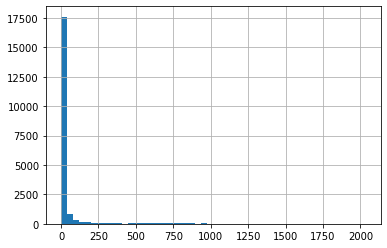

In [35]:
# Look at distribution of scores (popularity)
clean_beatles_subs['score'].hist(bins=50);

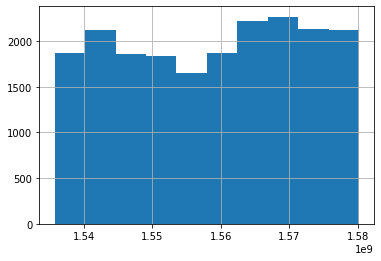

In [36]:
# Look at distribution of time created/posted
clean_beatles_subs['created_utc'].hist();

The columns 'score' and 'created_utc' are metadata and their distributions look logical. Data cleaning left is all NLP parsing, which is done in Notebook 03_NLP_Parsing.

In [37]:
# Define a function to create two new columns: ['author_full', 'all_text']
def create_author_text_columns(data):    
    
    # Create a column that combines 'author' and 'author_flair_text'
    author_full = []
    for auth, flair in list(zip(data['author'], data['author_flair_text'])):
        if (auth != '-') & (flair != '-'):
            full_auth = f'{auth} {flair}'
            author_full.append(full_auth)
        elif (auth == '-') & (flair != '-'):
            author_full.append(flair)
        elif (auth != '-') & (flair == '-'):
            author_full.append(auth)
        elif (auth == '-') & (flair == '-'):
            author_full.append('-')
        else: print('prob with your code gur')
    data['author_full'] = author_full
    
    # Create a column that combines 'title','selftext', and 'body' (if applicable)
    all_text = []
    if 'body' not in data.columns:
        for title, selftext in list(zip(data['title'], data['selftext'])):
            if (title != '-') & (selftext != '-'):
                full_text = f'{title} {selftext}'
                all_text.append(full_text)
            elif (title == '-') & (selftext != '-'):
                all_text.append(selftext)
            elif (title != '-') & (selftext == '-'):
                all_text.append(title)
            elif (title == '-') & (selftext == '-'):
                all_text.append('-')
            else: print('prob with your code gur')
        data['all_text'] = all_text
        
    else:
        for title, selftext, body in list(zip(data['title'], data['selftext'], data['body'])):
            if (title != '-') & (selftext != '-') & (body != '-'):
                full_text = f'{title} {selftext} {body}'
                all_text.append(full_text)
            elif (title != '-') & (selftext != '-') & (body == '-'):
                full_text = f'{title} {selftext}'
                all_text.append(full_text)
            elif (title != '-') & (selftext == '-') & (body != '-'):
                full_text = f'{title} {body}'
                all_text.append(full_text)
            elif (title == '-') & (selftext != '-') & (body != '-'):
                full_text = f'{selftext} {body}'
                all_text.append(full_text)
            elif (title != '-') & (selftext == '-') & (body == '-'):
                all_text.append(title)
            elif (title == '-') & (selftext != '-') & (body == '-'):
                all_text.append(selftext)
            elif (title == '-') & (selftext == '-') & (body != '-'):
                all_text.append(body)    
            elif (title == '-') & (selftext == '-') & (body == '-'):
                all_text.append('-')
            else: print('prob with your code gur')
        data['all_text'] = all_text
    
    return data


In [38]:
# Create two new columns for analysis
clean_beatles_subs = create_author_text_columns(clean_beatles_subs)

### Queen submissions

In [39]:
# Look for nulls (address later)
clean_queen_subs.isnull().sum()

author                   0
author_flair_text    19993
created_utc              0
score                    0
selftext             14555
subreddit                0
title                    0
dtype: int64

In [40]:
# Look at number of author values where author == ['deleted']
clean_queen_subs.loc[clean_queen_subs['author'] == '[deleted]', 'author'].count()

509

In [41]:
# Look at number of selftext values where selftext == ['deleted']
clean_queen_subs.loc[clean_queen_subs['selftext'] == '[deleted]', 'selftext'].count()

285

In [42]:
# Drop rows where 'author' or 'selftext' == '[deleted]'
clean_queen_subs = drop_deleted(clean_queen_subs, ['author', 'selftext'])

# Check that changes stuck
clean_queen_subs[(clean_queen_subs['author'] == '[deleted]') | (clean_queen_subs['selftext'] == '[deleted]')]

,author,author_flair_text,created_utc,score,selftext,subreddit,title


In [43]:
# Check new number of rows
clean_queen_subs.shape

(19491, 7)

In [44]:
# Make sure all 'subreddit' == 'queen'
clean_queen_subs[clean_queen_subs['subreddit'] != 'queen']

,author,author_flair_text,created_utc,score,selftext,subreddit,title


In [45]:
# Replace nulls with '-'
clean_queen_subs = replace_nulls(clean_queen_subs, ['author_flair_text', 'selftext'])

# Check that changes stuck
clean_queen_subs[(clean_queen_subs['author_flair_text'].isnull()) | (clean_queen_subs['selftext'].isnull())]


,author,author_flair_text,created_utc,score,selftext,subreddit,title


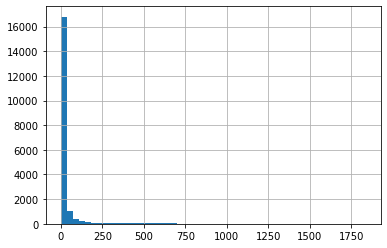

In [46]:
# Look at distribution of scores (popularity)
clean_queen_subs['score'].hist(bins=50);

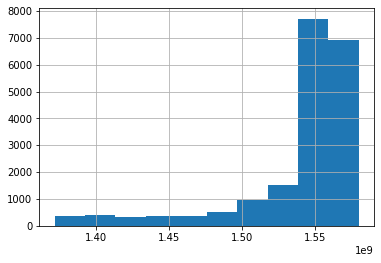

In [47]:
# Look at distribution of time created/posted
clean_queen_subs['created_utc'].hist();

Queen fans post on the Queen subreddit much less often than Beatles fans post on theirs, so posts in this dataset come from further back. However, the majority are from the same time period, and this shouldn't affect our classification greatly. Scores look similarly distributed for Queen as for Beatles.

In [48]:
# Create two new columns for analysis
clean_queen_subs = create_author_text_columns(clean_queen_subs)

### Beatles comments

In [49]:
# Look for nulls (address later)
clean_beatles_coms.isnull().sum()

author                   0
author_flair_text    15097
body                 19500
created_utc              0
score                    0
selftext             14147
subreddit                0
title                  500
dtype: int64

In [50]:
# Look at rows where title is null
clean_beatles_coms[clean_beatles_coms['title'].isnull()].head()

,author,author_flair_text,body,created_utc,score,selftext,subreddit,title
0,356BC,NaN,"Sorry, I wasn't trying to sound like a dick. I...",1580156460,1,NaN,beatles,NaN
1,EveningsAndWeekends,NaN,"Oh man to be one of those standing there, watc...",1580156243,1,NaN,beatles,NaN
2,EveningsAndWeekends,NaN,Ded from those sick beats,1580156204,1,NaN,beatles,NaN
3,Bowiequeen,NaN,Living is easy with eyes closed,1580156077,1,NaN,beatles,NaN
4,Scrutchpipe,NaN,It would be good to do a ‘where are they now’ ...,1580155942,1,NaN,beatles,NaN


Rows with no title appear to often have a body, thus are still probably useful and able to be classified. Investigate rows where selftext, body, and title are all null. Keep and replace other null titles with '-' later.

In [51]:
# Define a function to turn all '[deleted]' or '[removed]' to null values
def to_nulls(data):
    for col in data.columns:
        data.loc[((data[col]=='[deleted]') | (data[col]=='[removed]')), col] = np.nan
    return data

In [52]:
# Change all cells with '[deleted]' or '[removed]' to null values
clean_beatles_coms = to_nulls(clean_beatles_coms)

# Confirm changes
clean_beatles_coms[(clean_beatles_coms['author'] == '[deleted]') | 
                    (clean_beatles_coms['author'] == '[removed]')]

/Users/kelly/anaconda3/envs/dsi/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,author,author_flair_text,body,created_utc,score,selftext,subreddit,title


In [53]:
# Define a function to drop all rows will all null values in list passed
def drop_null_rows(data, col_list):
    data.dropna(how='all', subset=col_list, inplace=True)
    return data

In [54]:
# Drop all rows where ['author', 'selftext', 'body', 'title'] are all null
cols_with_nulls = ['author', 'selftext', 'body', 'title']
clean_beatles_coms = drop_null_rows(clean_beatles_coms, cols_with_nulls)

In [55]:
# Check that changes stuck
clean_beatles_coms[(clean_beatles_coms['author'].isnull()) &  
                    (clean_beatles_coms['selftext'].isnull()) & 
                    (clean_beatles_coms['body'].isnull()) & 
                    (clean_beatles_coms['title'].isnull())]


,author,author_flair_text,body,created_utc,score,selftext,subreddit,title


In [56]:
clean_beatles_coms.shape

(19983, 8)

In [57]:
clean_beatles_coms.isnull().sum()

author                  38
author_flair_text    15080
body                 19500
created_utc              0
score                    0
selftext             14418
subreddit                0
title                  483
dtype: int64

In [58]:
# See if there are any rows with nulls in BOTH 'title' and 'body'
clean_beatles_coms[(clean_beatles_coms['body'].isnull()) & (clean_beatles_coms['title'].isnull())]


,author,author_flair_text,body,created_utc,score,selftext,subreddit,title


All rows have either a body or a title, and another ~5,500 rows have selftext as well.

In [59]:
# Replace nulls with '-'
cols_to_fill = ['author', 'author_flair_text', 'selftext', 'title', 'body']
clean_beatles_coms = replace_nulls(clean_beatles_coms, cols_to_fill)

# Check that changes stuck
clean_beatles_coms.isnull().sum()

author               0
author_flair_text    0
body                 0
created_utc          0
score                0
selftext             0
subreddit            0
title                0
dtype: int64

In [60]:
# Make sure all 'subreddit' == 'beatles'
clean_beatles_coms[clean_beatles_coms['subreddit'] != 'beatles']

,author,author_flair_text,body,created_utc,score,selftext,subreddit,title


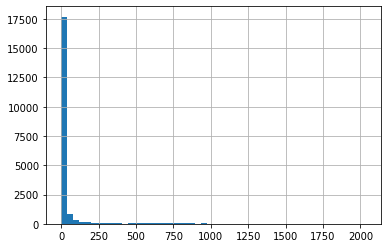

In [61]:
# Look at distribution of scores (popularity)
clean_beatles_coms['score'].hist(bins=50);

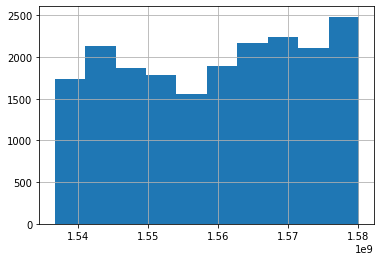

In [62]:
# Look at distribution of time created/posted
clean_beatles_coms['created_utc'].hist();

Distributions of score and time created are very similar to the distributions for the beatles submissions data and the queen submissions scores.

In [63]:
# Create two new columns for analysis
clean_beatles_coms = create_author_text_columns(clean_beatles_coms)

### Queen comments

In [64]:
# Look for nulls (address later)
clean_queen_coms.isnull().sum()

author                   0
author_flair_text    19993
body                 19500
created_utc              0
score                    0
selftext             14659
subreddit                0
title                  500
dtype: int64

In [65]:
# Look at rows where title is null
clean_queen_coms[clean_queen_coms['title'].isnull()].head()

,author,author_flair_text,body,created_utc,score,selftext,subreddit,title
0,Chevalenz,NaN,Gotta be honest: 'Hang On In There' and 'Khash...,1580155931,1,NaN,queen,NaN
1,EFF198783,NaN,Freddie should be on 1st place!!!,1580155699,1,NaN,queen,NaN
2,Dilanep37,NaN,"I can get why you don't like hot space, as it ...",1580154020,1,NaN,queen,NaN
3,Dilanep37,NaN,"nah, I like a lot of other songs on the album....",1580153636,1,NaN,queen,NaN
4,Jakeybaby125,NaN,That's you opinion but I honestly think it's q...,1580153373,1,NaN,queen,NaN


Again, rows with no title appear to often have a body. Follow same procedure as above.

In [66]:
# Change all cells with '[deleted]' or '[removed]' to null values
clean_queen_coms = to_nulls(clean_queen_coms)

# Confirm changes
clean_queen_coms[(clean_queen_coms['author'] == '[deleted]') | 
                    (clean_queen_coms['author'] == '[removed]')]

,author,author_flair_text,body,created_utc,score,selftext,subreddit,title


In [67]:
# Check if any rows where ['author', 'selftext', 'body', 'title'] are all null
clean_queen_coms[(clean_queen_coms['author'].isnull()) &  
                    (clean_queen_coms['selftext'].isnull()) & 
                    (clean_queen_coms['body'].isnull()) & 
                    (clean_queen_coms['title'].isnull())]


,author,author_flair_text,body,created_utc,score,selftext,subreddit,title


There are no rows to drop from the queen comments dataset.

In [68]:
# Check if any rows where ['selftext', 'body', 'title'] are all null
clean_queen_coms[(clean_queen_coms['selftext'].isnull()) & 
                 (clean_queen_coms['body'].isnull()) & 
                 (clean_queen_coms['title'].isnull())]


,author,author_flair_text,body,created_utc,score,selftext,subreddit,title


All rows have at least a title, selftext, or body to analyze with NLP.

In [69]:
# See if there are any rows with nulls in BOTH 'title' and 'body'
clean_queen_coms[(clean_queen_coms['body'].isnull()) & (clean_queen_coms['title'].isnull())]


,author,author_flair_text,body,created_utc,score,selftext,subreddit,title


All rows have either a body or a title, and another ~5,300 rows have selftext as well.

In [70]:
# Replace nulls with '-'
clean_queen_coms = replace_nulls(clean_queen_coms, cols_to_fill)

# Check that changes stuck
clean_queen_coms.isnull().sum()

author               0
author_flair_text    0
body                 0
created_utc          0
score                0
selftext             0
subreddit            0
title                0
dtype: int64

In [71]:
# Make sure all 'subreddit' == 'queen'
clean_queen_coms[clean_queen_coms['subreddit'] != 'queen']

,author,author_flair_text,body,created_utc,score,selftext,subreddit,title


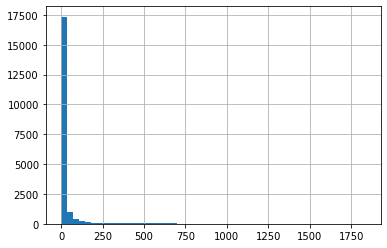

In [72]:
# Look at distribution of scores (popularity)
clean_queen_coms['score'].hist(bins=50);

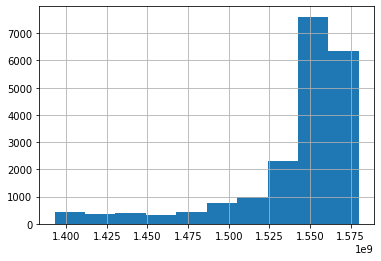

In [73]:
# Look at distribution of time created/posted
clean_queen_coms['created_utc'].hist();

Distributions look very similar to those for the queen submissions data. Posts go back further than the beatles data, but scores look similarly distributed amongst all datasets.

In [74]:
# Create two new columns for analysis
clean_queen_coms = create_author_text_columns(clean_queen_coms)

## Export four clean dataframes to use for analysis

In [75]:
# Export clean Beatles submissions data
clean_beatles_subs.to_csv('./data/clean_beatles_subs.csv', index=False)

In [76]:
# Export clean Queen submissions data
clean_queen_subs.to_csv('./data/clean_queen_subs.csv', index=False)

In [77]:
# Export clean Beatles comments data
clean_beatles_coms.to_csv('./data/clean_beatles_coms.csv', index=False)

In [78]:
# Export clean Queen comments data
clean_queen_coms.to_csv('./data/clean_queen_coms.csv', index=False)